In [1]:
import numpy as np
import pandas as pd
import random

from scipy import stats
from math import e, factorial
from env import user, host, password

import matplotlib.pyplot as plt

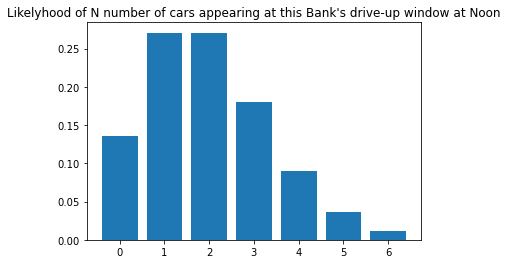

In [2]:
# 1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a 
# Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions 
# concerning the probability of cars waiting at the drive-up window.

    # 1a What is the probability that no cars drive up in the noon hour?
    
mean = 2

X = [r for r in range(7)]

y = [((e**-mean) * (mean**x)) / (factorial(x)) for x in X]

plt.bar(X,y)
plt.title("Likelyhood of N number of cars appearing at this Bank's drive-up window at Noon")
plt.show()

In [3]:

mean = 2
target = 0
stats.poisson(mean).pmf(target)


0.1353352832366127

In [4]:
# 1a What is the probability that no cars drive up in the noon hour?simulation
nrows = 100_000 # set nrows to number of simulations
ncols = 1       # set ncolumns to number of dice rolled in each simulation

# create an nrows by ncols dataframe for the simulation
rolls = np.random.poisson(mean, nrows * ncols).reshape(nrows, ncols) 

df = pd.DataFrame(rolls)
df['zero_cars'] = df[0] == target
no_cars = int(round(df.zero_cars.mean(),2) * 100)

print(f"the odds of seeing {target} cars at the bank at noon are {no_cars}%")

the odds of seeing 0 cars at the bank at noon are 14%


In [5]:
# 1b. What is the probability that 3 or more cars come through the drive through?

stats.poisson(2).sf(3-1)

0.32332358381693654

In [6]:
# 1a. simulation
mean = 2
target = 3
nrows = 100_000 # set nrows to number of simulations
ncols = 1       # set ncolumns to number of dice rolled in each simulation

# create an nrows by ncols dataframe for the simulation
rolls = np.random.poisson(mean, nrows * ncols).reshape(nrows, ncols) 

df = pd.DataFrame(rolls)
df.head()

# add calculation columns
df['zero_cars'] = df[0] >= target
df.head()
no_cars = int(round(df.zero_cars.mean(),2) * 100)

print(f"the odds of seeing {target} cars at the bank at noon are {no_cars}%")

the odds of seeing 3 cars at the bank at noon are 32%


In [7]:
# 1b. How likely is it that the drive through gets at least 1 car?
mean = 2
target = 1
stats.poisson(mean).sf(target-1)

0.8646647167633873

In [8]:
#1b. Simulation

nrows = 100_000 # set nrows to number of simulations
ncols = 1       # set ncolumns to number of dice rolled in each simulation

# create an nrows by ncols dataframe for the simulation
rolls = np.random.poisson(mean, nrows * ncols).reshape(nrows, ncols) 

df = pd.DataFrame(rolls)
df.head()

# add calculation columns
df['zero_cars'] = df[0] >= target

# get mean of True / False columns 
# format and print results
no_cars = int(round(df.zero_cars.mean(),2) * 100)

print(f"the odds of seeing {target} cars at the bank at noon are {no_cars}%")

the odds of seeing 1 cars at the bank at noon are 86%


In [9]:
# 2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of 
# .3. Calculate the following:

    # 2a. What grade point average is required to be in the top 5% of the graduating class?
 
mean = 3
sd = .3

stats.norm(mean, sd).ppf(.95)

3.4934560880854417

In [10]:
stats.norm(mean, sd).isf(.05)

3.4934560880854417

In [11]:
#2a simulation

nrows = 100_000 # set nrows to number of simulations
ncols = 1       # set ncolumns to number of dice rolled in each simulation

# create an nrows by ncols dataframe for the simulation
rolls = np.random.normal(mean, sd, nrows * ncols).reshape(nrows, ncols) 

df = pd.DataFrame(rolls)

# add calculation columns
df['rank'] = pd.qcut(df[0], q=20, labels=False)
df = df[df['rank'] == 19]
df[0].min()

3.4947767049468754

In [12]:
# 2b. What GPA constitutes the bottom 15% of the class?

stats.norm(mean, sd).ppf(.15)

#point = stats.norm(3, .03)
#top_5_percent = point.ppf(.85)
#print('{:,.0f}'.format(top_5_percent))   

2.689069983151863

In [13]:
# 2b. Simulation

nrows = 100_000 # set nrows to number of simulations
ncols = 1       # set ncolumns to number of dice rolled in each simulation

# create an nrows by ncols dataframe for the simulation
rolls = np.random.normal(mean, sd, nrows * ncols).reshape(nrows, ncols) 

df = pd.DataFrame(rolls)

# add calculation columns
df['rank'] = pd.qcut(df[0], q=20, labels=False)

df = df[df['rank'] == 2]

df[0].max()

2.688430579224189

In [14]:
# 2c. An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class.
 #Determine the range of the third decile. 

# .2 to .3 Third decile 
# .1 to .2
# .0 to .1    

In [15]:
# 2c.

start = stats.norm(mean, sd).ppf(.20)
start

2.7475136299281258

In [16]:
end = stats.norm(mean, sd).ppf(.30)
end

2.842679846187588

In [17]:
print(f"The range of the third decile is from {round(start,2)} to {round(end,2)}.")

The range of the third decile is from 2.75 to 2.84.


In [18]:
# 2c. Simulation
nrows = 100_000 # set nrows to number of simulations
ncols = 1       # set ncolumns to number of dice rolled in each simulation

# create an nrows by ncols dataframe for the simulation
rolls = np.random.normal(mean, sd, nrows * ncols).reshape(nrows, ncols) 

df = pd.DataFrame(rolls)

# add calculation columns
df['rank'] = pd.qcut(df[0], q=10, labels=False)

df = df[df['rank'] == 2]

df[0].min()

2.7481149581089968

In [19]:
df[0].max()


2.8428093381952384

In [20]:
# 2d. Would a student with a 2.8 grade point average qualify for this scholarship?
Yes

NameError: name 'Yes' is not defined

In [ ]:
# 2e. If I have a GPA of 3.5, what percentile am I in?
stats.norm(mean, sd).cdf(3.5)

In [ ]:
percentile = int(round(stats.norm(mean, sd).cdf(3.5),2) * 100)

print(f"You are in the {percentile}th percentile!")

In [ ]:
# 2e. Simulation

nrows = 100_000 # set nrows to number of simulations
ncols = 1       # set ncolumns to number of dice rolled in each simulation

# create an nrows by ncols dataframe for the simulation
rolls = np.random.normal(mean, sd, nrows * ncols).reshape(nrows, ncols) 

df = pd.DataFrame(rolls)

# amount of data over with scores > 3.5 divided by all the data 
len(df[df[0] < 3.5]) / len(df)

In [ ]:
# 3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 
# click-throughs. How likely is it that this many people or more click through?

prob_success = .02
n_trials = 4326

target_successes = 97

stats.binom(n_trials, prob_success).sf(target_successes-1)

In [ ]:
# 3. Simulation
nrows = 100_000 # set nrows to number of simulations
ncols = 1    # set ncolumns to number of dice rolled in each simulation

# create an nrows by ncols dataframe for the simulation
rolls = np.random.binomial(n_trials, prob_success, nrows * ncols).reshape(nrows, ncols) 

df = pd.DataFrame(rolls)

# add calculated columns
df['97ish'] = df[0] >= 97
df.head()

In [ ]:
# get the mean of the True / False column
df['97ish'].mean()

In [ ]:
# 4. You are working on some statistics homework consisting of 100 questions where all of the answers are a 
# probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the 
# answer to each question.
# What is the probability that at least one of your first 60 answers is correct?

prob_success = .01
n_trials = 60
desired_successes = 1

stats.binom(n_trials, prob_success).sf(desired_successes-1)

In [ ]:
# 4. Simulation

nrows = 100_000 # set nrows to number of simulations
ncols = 60    # set ncolumns to number of dice rolled in each simulation

# create an array with nrows by ncols dataframe for the simulation
rolls = np.random.choice([True, False], nrows * ncols, p=[.01,.99]).reshape(nrows, ncols) 

# convert to data frame
df = pd.DataFrame(rolls)

df["correct"] = df.sum(axis=1) > 0
df["correct"].mean()

In [ ]:
# 5. The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's 
# a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of 
# the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up 
# each day? 

#How likely is it that the break area gets cleaned up each day?

prob_success = .03
n_trials = (22 * 3) * .9

desired_successes = 1

stats.binom(n_trials, prob_success).sf(desired_successes-1)

In [ ]:
# 5. Simulation



nrows = 100_000 # set nrows to number of simulations
ncols = 1    # set ncolumns to number of dice rolled in each simulation

# create an array with nrows by ncols dataframe for the simulation
rolls = np.random.binomial(n_trials, prob_success, nrows * ncols).reshape(nrows, ncols) 

# convert to data frame
df = pd.DataFrame(rolls)

df["Clean"] = df.sum(axis=1) > 0
df["Clean"].mean()

In [ ]:
#5b. How likely is it that it goes two days without getting cleaned up? All week?

# one day without cleaning

1-stats.binom(n_trials, prob_success).sf(desired_successes-1)

In [ ]:
# odds of not being cleaned for two days in a row

(1-stats.binom(n_trials, prob_success).sf(desired_successes-1))**2

In [ ]:
#5b. Simulation

nrows = 100_000 # set nrows to number of simulations
ncols = 2    # set ncolumns to number of dice rolled in each simulation

# create an array with nrows by ncols dataframe for the simulation
rolls = np.random.binomial(n_trials, prob_success, nrows * ncols).reshape(nrows, ncols) 

# convert to data frame
df = pd.DataFrame(rolls)

df["dirty"] = df.sum(axis=1) == 0
df["dirty"].mean()

In [ ]:
#5c. All week

(1-stats.binom(n_trials, prob_success).sf(desired_successes-1))**5

In [ ]:
#5c All week - simulation

nrows = 100_000 # set nrows to number of simulations
ncols = 5    # set ncolumns to number of dice rolled in each simulation

# create an array with nrows by ncols dataframe for the simulation
rolls = np.random.binomial(n_trials, prob_success, nrows * ncols).reshape(nrows, ncols) 

# convert to data frame
df = pd.DataFrame(rolls)

df["dirty"] = df.sum(axis=1) == 0
df["dirty"].mean()

In [ ]:
# 6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After 
# several weeks of careful observation, you notice that the average number of people in line when your lunch break 
# starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each 
# person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least
# 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and 
# ignore travel time to and from La Panaderia.

# get information from the problem
# normal distribution
mean_customers_in_line = 15
sd_customers_in_line = 3

time_per_order = 2

time_to_get_food = 10
time_to_eat_food = 15

total_time = 60

In [ ]:
# get time I can spend in line
max_time_in_line = total_time - time_to_get_food - time_to_eat_food
max_time_in_line

In [ ]:
# calculate total number of customers I can wait for in that time
max_customers_in_line = max_time_in_line / time_per_order
max_customers_in_line

In [ ]:
# get odds of max_customers_in_line or less customers
stats.norm(mean_customers_in_line, sd_customers_in_line).cdf(max_customers_in_line)

In [ ]:
#6. Simulation
nrows = 100_000 # set nrows to number of simulations
ncols = 1       # set ncolumns to number of dice rolled in each simulation

# create an array with nrows by ncols dataframe for the simulation
rolls = np.random.normal(mean_customers_in_line, sd_customers_in_line, nrows * ncols).reshape(nrows, ncols) 

# convert to data frame
df = pd.DataFrame(rolls)

df["can_wait"] = df.sum(axis=1) <= 17.5
df.head()

In [ ]:
df["can_wait"].mean()

In [ ]:
# 8. Connect to the employees database and find the average salary of current employees, along with the standard 
# deviation. For the following questions, calculate the answer based on modeling the employees salaries with a 
# normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual 
# values present in the salaries dataset.

    #What percent of employees earn less than 60,000?
    #What percent of employees earn more than 95,000?
    #What percent of employees earn between 65,000 and 80,000?
    #What do the top 5% of employees make?

def get_data_from_sql(user, host, password, database, query):
    '''
    take in user, host, password, 
    database and query
    Access sql database
    return a pandas dataframe of the query results   
    '''
    
    url = f'mysql+pymysql://{user}:{password}@{host}/{database}'
        
    return pd.read_sql(query, url)

In [ ]:
database = 'employees'

query = """

SELECT salary
FROM salaries

where salaries.to_date = "9999-01-01"

"""

df = get_data_from_sql(user, host, password, database, query)

In [ ]:
df.head()

In [ ]:
df.salary.hist(bins=20)
plt.title("The Distribution of Employee Salaries is Actually Pretty Normal")
plt.show()

In [ ]:
df.describe()

In [ ]:
# Average Salary
mean_salary = round(df.salary.mean(),0)
mean_salary

In [ ]:
# Standard Deviation
sd_salary = round(df.salary.agg(np.std),0)
sd_salary

In [ ]:
# a) What percent of employees earn less than 60,000?
stats.norm(mean_salary, sd_salary).cdf(60_000)

In [ ]:
# b) What percent of employees earn more than 95,000?
stats.norm(mean_salary, sd_salary).sf(95_000)

In [ ]:
len(df[df.salary > 95_000]) / len(df)

In [ ]:
# c) What percent of employees earn between 65,000 and 80,000?
# percent of employees making 65,000 or more

stats.norm(mean_salary, sd_salary).cdf(65_000)

In [ ]:
# percent of employees making 80,000 or less
stats.norm(mean_salary, sd_salary).cdf(80_000)

In [ ]:
# subtract the percent of employees making 65,000 from the percent of employees making 80,000 or less
# to get the percent of people making between 65,000 and 80,000
stats.norm(mean_salary, sd_salary).cdf(80_000) - stats.norm(mean_salary, sd_salary).cdf(65_000)

In [ ]:
# 8. Simulation
len(df[df.salary < 65_000]) / len(df)

In [ ]:
len(df[df.salary < 80_000]) / len(df)


In [ ]:
(len(df[df.salary < 80_000]) / len(df)) - (len(df[df.salary < 65_000]) / len(df))

In [ ]:
# d) What do the top 5% of employees make?
stats.norm(mean_salary, sd_salary).isf(.05)

In [ ]:
# d) What do the top 5% of employees make?
# add calculation columns
df['rank'] = pd.qcut(df['salary'], q=20, labels=False)

df = df[df['rank'] == 19]
df.head()

In [ ]:
df['salary'].min()